# Predicting Salary Using Machine Learning

we're going to take following approch:

1. Problem defination
2. Data
3. Evaluation
4. Featuring
5. Modeling
6. Experimentation

## 1. Problem Defination:

In a statement,
> Given the HR parameter about employees, can we predict how salary is varying with respect to other considerable factors.

## 2 Data

> The Origanal data came from  LMS.

## 3. Evaluation

> The gole of most regression based problem is minimized the error, Our gole for this problem is minimized RMSE.

## 4 Features

* Gender - talks of the gender - Male or female
* Business - if the person has a business or no
* Age - age of the person
* Salary - CTC of the employee
* Dependants - number of people dependant on the person
* Months - duration of the person employed with the company
* Calls - if the person has authority to make calls or not
* Type - salary settlement type
* Billing - Subscribed to billing plans or no
* Unit sales - unit sale made by the person
* Total sales - total sales made by the person
* Rating - If he has been given a rating by a superior or no
* Bonus - amount received by a person as bonus for sales
* Base pay - Base pay of the employee
* Unit price - The Unit price of a sale
* Volume - volume allotted to a person
* Opening balance - The opening balance of an employee
* Low - lowest balance allotted to a person.
* Closing Balance- The closing balance of an employee
* Education- Educational background of an employee

In [1]:
#Importing Libraries.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy.stats import skew

#selecting plot style.
plt.style.use('seaborn')

In [2]:
#load the data into the dataframe.
df = pd.read_csv("New_data_Set.csv")
df.head()

D:\Users\Pranay\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,High School or less


In [3]:
#Having a look at the unique values inside Type and Education columns.
Type = df['Type'].unique()
print('Type:',Type)

Education= df['Education'].unique()
print('Education:',Education)

Type: ['Month-to-month' 'Two year' 'One year']
Education: ['High School or less' 'Intermediate' 'Graduation' 'PG']


In [4]:
#Map the value on the Type column.
df['Type'] = df['Type'].map({'Month-to-month': 0, 'Two year': 1, 'One year': 2})

#Map the value on the Type column.
df['Education'] = df['Education'].map({'High School or less': 0, 'Intermediate': 1, 'Graduation': 2, 'PG': 3})

In [5]:
#Having a look at the unique values inside Type and Education columns Now.
Type = df['Type'].unique()
print('Type:',Type)

Education= df['Education'].unique()
print('Education:',Education)

Type: [0 1 2]
Education: [0 1 2 3]


* As we can see our: (Type, Education) columns are now converted into the numeric format.

In [6]:
#Having a look at the shape of the dataset.
df.shape

(5000, 20)

* As we can see, we have 5000 rows and 20 columns in our dataset.

In [7]:
#Droping duplicates if there are any.
df = df.drop_duplicates(keep = 'first')

In [8]:
#Having a look at the shape now.
df.shape

(5000, 20)

* We can say that there are no duplicate values are present inside our dataset.

In [9]:
#Having a look at the dtype.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   int64  
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4992 non-null   o

* As we know total_sales is a numeric column. So, it cannot be an object.
* Let's convert it into the numeric format.

In [10]:
#Converting Total_Sales column into the numeric format.
df['Total_Sales'] = pd.to_numeric(df['Total_Sales'],errors='coerce')
df.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,0,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.80,0,0
1,Female,0,No,Yes,0,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,0
2,Male,0,No,Yes,0,Yes,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.90,0,0
3,Female,1,No,Yes,0,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19.00,0,0
4,Male,0,No,Yes,0,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,0


In [11]:
#Having a look at the datatype now.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   int64  
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4984 non-null   f

* As we can see the Total_Sales column has now been converted into numeric format.

In [12]:
#Having a look at the missing values.
df.isna().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1476
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales         16
Months               0
Education            0
dtype: int64

* As we can see, we have some missing values inside Base_pay, opening balance, and in Total_sales columns.

In [13]:
#Replacing the missing values with there median.
for label,content in df.items():
    
    if pd.api.types.is_numeric_dtype(content):
        
        if pd.isnull(content).sum():
            
            print(label)
            df[label] = content.fillna(content.median())

Base_pay
openingbalance
Total_Sales


In [14]:
#Having a look at the missing values.
df.isna().sum()

Gender            0
Business          0
Dependancies      0
Calls             0
Type              0
Billing           0
Rating            0
Age               0
Salary            0
Base_pay          0
Bonus             0
Unit_Price        0
Volume            0
openingbalance    0
closingbalance    0
low               0
Unit_Sales        0
Total_Sales       0
Months            0
Education         0
dtype: int64

* Now we don't have any kind of missing values inside our dataset.

In [15]:
#Having look at the dtype now.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   int64  
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        5000 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  5000 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     5000 non-null   f

In [16]:
#Having a look at aggregation.
df.describe()

,Business,Type,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.00000,5000.000000
mean,0.160000,0.650200,51.865000,99821.928553,40047.272517,4991.096428,51.258522,6.761260e+06,40.733263,43.577828,43.034129,64.84151,2269.56846,32.18480,2.584800
std,0.366643,0.799229,8.560691,25376.961744,10112.355045,1268.848087,52.244022,1.620476e+07,32.578853,37.148512,36.760641,30.13968,2264.62695,24.63673,0.520061
min,0.000000,0.000000,18.000000,5089.000000,2035.600000,254.450000,1.440000,0.000000e+00,3.680000,3.680000,3.650000,18.25000,18.80000,0.00000,0.000000
25%,0.000000,0.000000,47.000000,83890.338980,33744.021630,4194.516950,25.727500,1.283850e+06,26.397633,21.990000,21.718750,35.50000,389.21250,8.00000,2.000000
50%,0.000000,0.000000,52.000000,100579.378500,40282.016040,5028.968925,39.205000,2.870600e+06,33.119999,33.340000,32.880001,70.50000,1395.65000,28.00000,3.000000
75%,0.000000,1.000000,57.000000,116912.092475,46764.836975,5845.604624,58.715000,6.247100e+06,42.525000,51.117500,50.415000,89.95000,3722.33750,55.00000,3.000000
max,1.000000,2.000000,88.000000,199970.740000,79988.296000,9998.537000,629.511067,3.208684e+08,313.903904,313.688694,312.432438,118.75000,8684.80000,72.00000,3.000000


In [17]:
#Having a look at the distribution.
pg.normality(df)

,W,pval,normal
Business,0.440457,0.000000e+00,False
Type,0.723414,0.000000e+00,False
Age,0.990820,1.691929e-17,False
Salary,0.987063,5.153616e-21,False
Base_pay,0.986482,1.727304e-21,False
Bonus,0.987062,5.151575e-21,False
Unit_Price,0.553489,0.000000e+00,False
Volume,0.326129,0.000000e+00,False
openingbalance,0.618410,0.000000e+00,False
closingbalance,0.709553,0.000000e+00,False


* As we can see our data is not normally distributed.

In [18]:
#Taking all the Numeric columns.
Num_col = ['Business','Type','Age','Salary','Base_pay','Bonus','Unit_Price','Volume','openingbalance','closingbalance','low','Unit_Sales','Total_Sales','Months','Education']
Num_col

['Business',
 'Type',
 'Age',
 'Salary',
 'Base_pay',
 'Bonus',
 'Unit_Price',
 'Volume',
 'openingbalance',
 'closingbalance',
 'low',
 'Unit_Sales',
 'Total_Sales',
 'Months',
 'Education']

Business
1.8548520670059354


D:\Users\Pranay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


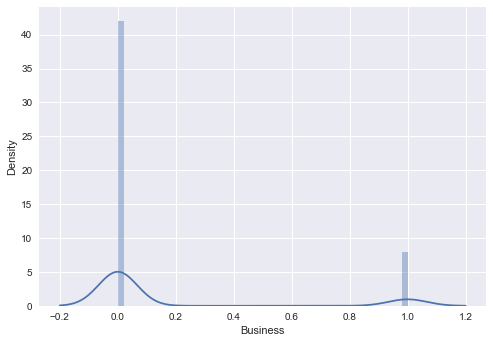

Type
0.7116232462489059


D:\Users\Pranay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


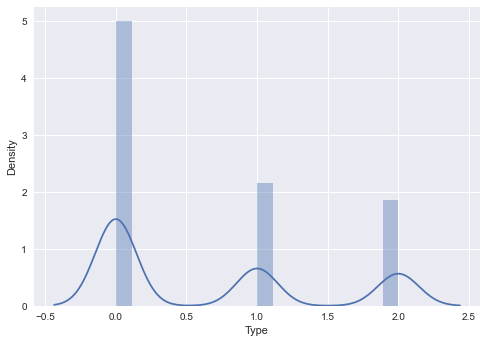

Age
-0.25989346454123136


D:\Users\Pranay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


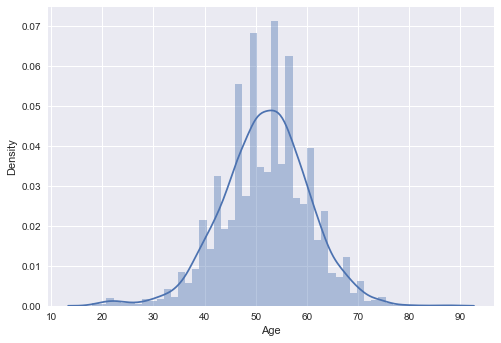

Salary
-0.3959227776154577


D:\Users\Pranay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


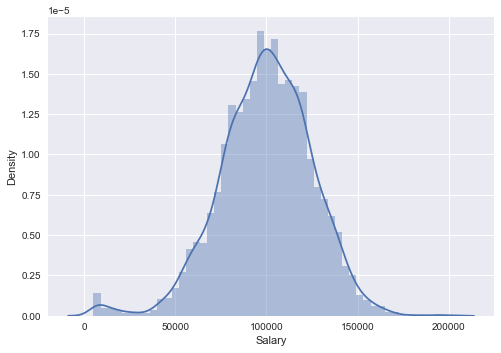

Base_pay
-0.3652457590369303


D:\Users\Pranay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


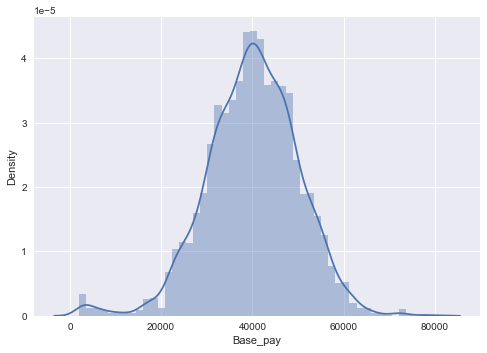

Bonus
-0.3959227777431069


D:\Users\Pranay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


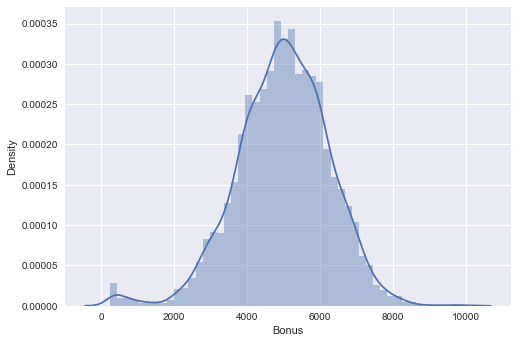

Unit_Price
5.987865994265544


D:\Users\Pranay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


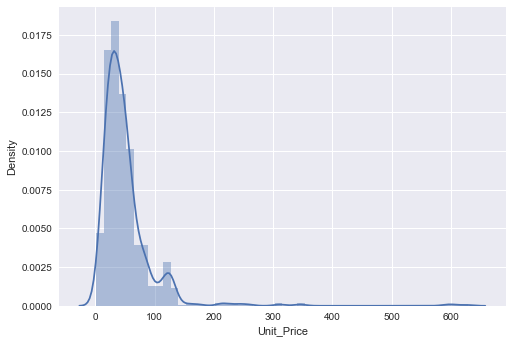

Volume
8.707122057422051


D:\Users\Pranay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


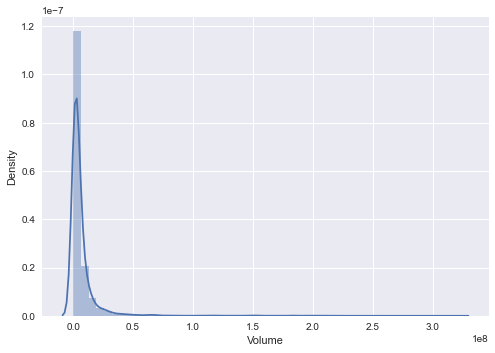

openingbalance
4.09356210531745


D:\Users\Pranay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


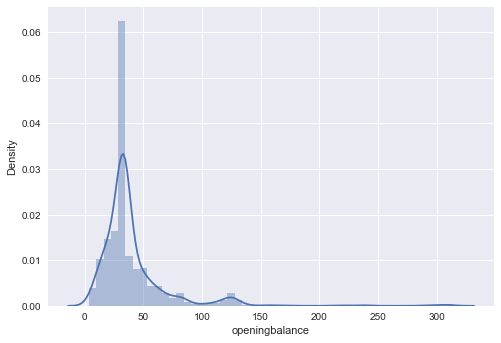

closingbalance
3.2254000593916365


D:\Users\Pranay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


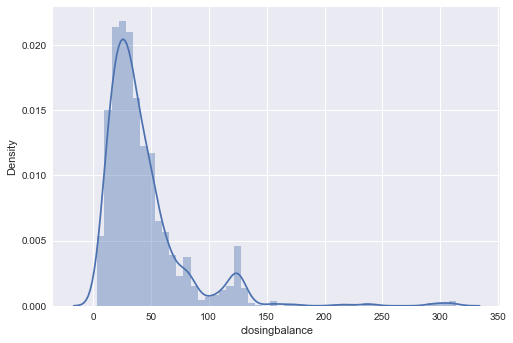

low
3.2326965274396677


D:\Users\Pranay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


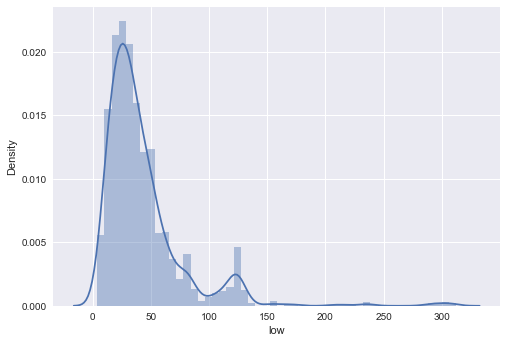

Unit_Sales
-0.22537960434031343


D:\Users\Pranay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


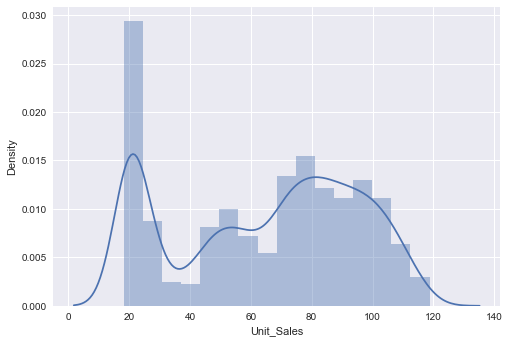

Total_Sales
0.9759772695770839


D:\Users\Pranay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


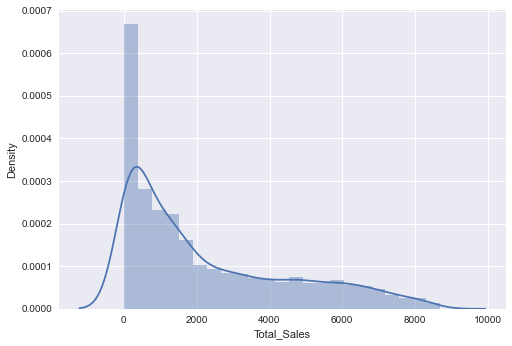

Months
0.2571966118774309


D:\Users\Pranay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


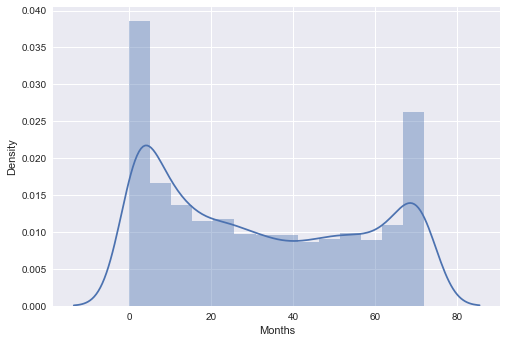

Education
-0.7566891728984119


D:\Users\Pranay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


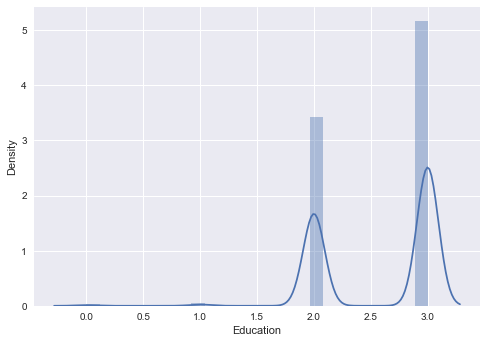

In [19]:
#Having a look at skewness of data.
for i in Num_col:
    print(i)
    print(skew(df[i]))
    
    #Visualization with the help of distplot.
    plt.figure()
    sns.distplot(df[i],kde = True)
    plt.show();

* As we can see, we have 3 type of skewed cloumns:
    1. Left skewed Columns: (Business, Unitprice, Volume, Closingbalance, low, Type,opening balance,total sale) 
    2. Right skewed Columns: (Education)
    3. Normally distributed Columns: (Age, Salary, Bonus,Base pay, Unit sales,month)

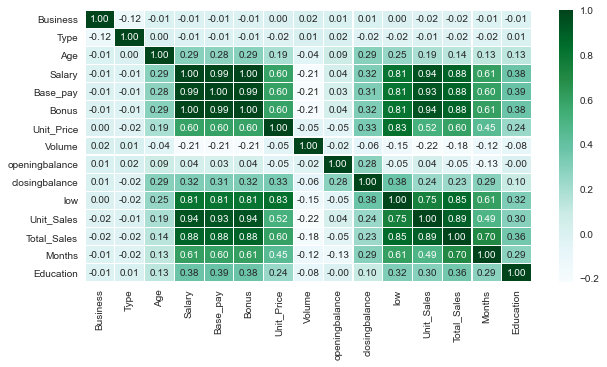

In [20]:
#Visualization correlation metrix.
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),
            annot = True,
            linewidths = "0.2",
            fmt = "0.2f",
            cmap = "BuGn");

* This correlation metrix represent:
    1. Higher the positive values represent higher the positive correlation.
    2. Higher the negative values represent higher the negative correlation.

In [21]:
#Now we try to reduce the skewness of those columns which are less correlated with the salary column.
#Because if we reduce the skewness of those columns which are highly correlated with salary then it may reduce the correlation with the salary column.

In [22]:
#Let's try to reduce the skewness of these columns: (Business, Type, Education, Volume, Closingbalance, opening balance).
#Because they have to vary less correlation with salary column.

#One more thing we cannot reduce skewness from this column:(Business, Type) because they have negative values.
#if we try to reduce skewness from this column:(Business, Type), then it will give us more null values.

#So now we have only one column : (Education, Volume, Closingbalance,opening balance)

In [23]:
#Performing sqrt transformation to remove skewness.
for i in range(0,2):
    df[['Education', 'Volume', 'closingbalance','openingbalance']] = np.sqrt(df[['Education', 'Volume', 'closingbalance','openingbalance']])

In [24]:
#Having a look at skewness now.
print(skew(df[['Education', 'Volume', 'closingbalance','openingbalance']]))

[-7.11618987  1.45120553  0.76471974  1.08340298]


* As we can see skewness of ('Volume', 'closing balance) columns has been reduced.

# Data Interpretation and Visualization

In [25]:
#Having a look at the dataset.
df.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,0,No,Yes,18,5089.00,2035.600,254.4500,3.77,67.876605,1.391579,1.392506,3.65,18.25,18.80,0,0.0
1,Female,0,No,Yes,0,No,Yes,19,5698.12,2279.248,284.9060,3.74,56.873765,1.400765,1.385039,3.65,18.40,18.85,0,0.0
2,Male,0,No,Yes,0,Yes,No,22,5896.65,2358.660,294.8325,3.89,65.813350,1.434119,1.439177,3.72,18.70,18.90,0,0.0
3,Female,1,No,Yes,0,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,90.178003,1.436655,1.440852,3.83,18.75,19.00,0,0.0
4,Male,0,No,Yes,0,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,71.996211,1.479394,1.449138,4.08,18.80,19.05,1,0.0


D:\Users\Pranay\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


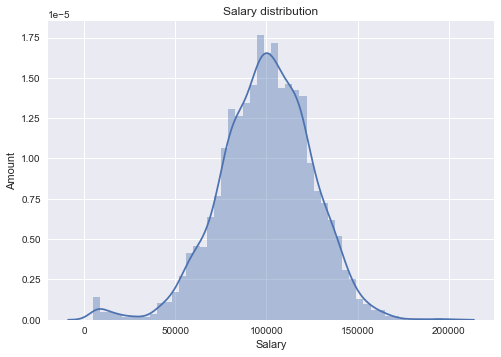

In [26]:
#Having a look at the salary distribution.
sns.distplot(df['Salary'],kde = True)
plt.title('Salary distribution')
plt.xlabel('Salary')
plt.ylabel('Amount');

* As we can see salary column seems like the normal distribution.

In [27]:
#Having a look at the gender column.
Gender_count = df['Gender'].value_counts()
Gender_count

Male      2528
Female    2472
Name: Gender, dtype: int64

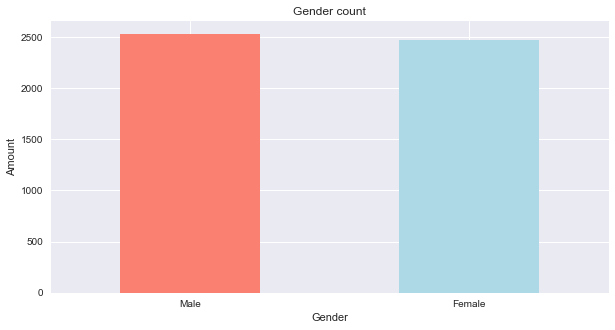

In [28]:
#Visualize Gender count.
Gender_count.plot(kind = "bar" , figsize = (10,5) , color = ['salmon','lightblue'])
plt.title('Gender count')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.xticks(rotation = 0);

* As we can see balanced distribution of the Gender column.

In [29]:
#Having a look at relation with gender and dependencies.
cross_tab = pd.crosstab(df['Gender'],df['Dependancies'])
cross_tab

Dependancies,No,Yes
Gender,,
Female,1756,716
Male,1768,760


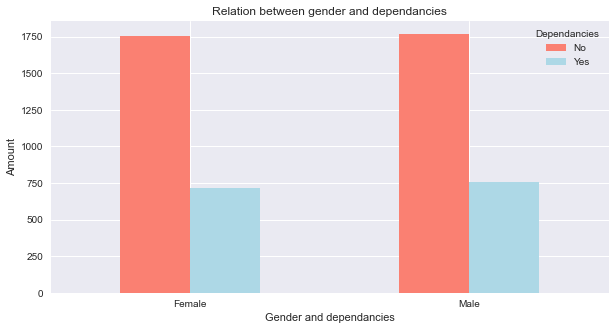

In [30]:
#Visualization
cross_tab.plot(kind = "bar" , figsize = (10,5) , color = ['salmon','lightblue'])
plt.title('Relation between gender and dependancies')
plt.xlabel('Gender and dependancies')
plt.ylabel('Amount')
plt.xticks(rotation = 0);

* Distribution of dependencies are balanced between males and females as we can see.

In [31]:
#Having a look at the dataset.
df.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,0,No,Yes,18,5089.00,2035.600,254.4500,3.77,67.876605,1.391579,1.392506,3.65,18.25,18.80,0,0.0
1,Female,0,No,Yes,0,No,Yes,19,5698.12,2279.248,284.9060,3.74,56.873765,1.400765,1.385039,3.65,18.40,18.85,0,0.0
2,Male,0,No,Yes,0,Yes,No,22,5896.65,2358.660,294.8325,3.89,65.813350,1.434119,1.439177,3.72,18.70,18.90,0,0.0
3,Female,1,No,Yes,0,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,90.178003,1.436655,1.440852,3.83,18.75,19.00,0,0.0
4,Male,0,No,Yes,0,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,71.996211,1.479394,1.449138,4.08,18.80,19.05,1,0.0


In [32]:
#Having a look at the relationship between gender and salary columns.
Rlt= df.groupby('Gender')['Salary'].sum()
Rlt

Gender
Female    2.453754e+08
Male      2.537342e+08
Name: Salary, dtype: float64

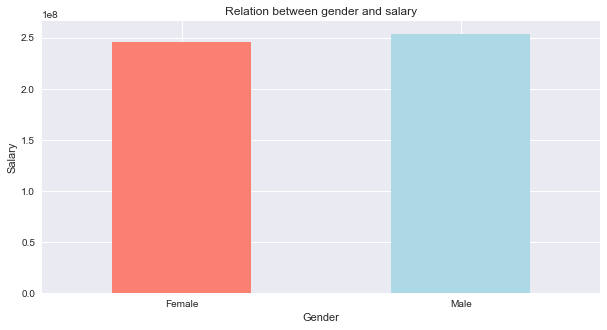

In [33]:
#Visualization
Rlt.plot(kind = "bar" , figsize = (10,5) , color = ['salmon','lightblue'])
plt.title('Relation between gender and salary')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.xticks(rotation = 0);

* Distribution of salary between male and female approx same.

In [34]:
#Having a look at the relation between Rating and salary columns.
Rlt= df.groupby('Rating')['Salary'].sum()
Rlt

Rating
No     3.670907e+08
Yes    1.320189e+08
Name: Salary, dtype: float64

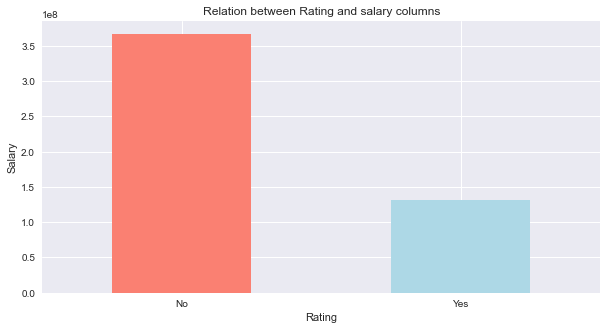

In [35]:
#Visualization
Rlt.plot(kind = "bar" , figsize = (10,5) , color = ['salmon','lightblue'])
plt.title('Relation between Rating and salary columns')
plt.xlabel('Rating')
plt.ylabel('Salary')
plt.xticks(rotation = 0);

* It shows there are a majority of people present over there who didn't get any Ratings from superior.

In [36]:
#Having a look at the dataset.
df.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,0,No,Yes,18,5089.00,2035.600,254.4500,3.77,67.876605,1.391579,1.392506,3.65,18.25,18.80,0,0.0
1,Female,0,No,Yes,0,No,Yes,19,5698.12,2279.248,284.9060,3.74,56.873765,1.400765,1.385039,3.65,18.40,18.85,0,0.0
2,Male,0,No,Yes,0,Yes,No,22,5896.65,2358.660,294.8325,3.89,65.813350,1.434119,1.439177,3.72,18.70,18.90,0,0.0
3,Female,1,No,Yes,0,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,90.178003,1.436655,1.440852,3.83,18.75,19.00,0,0.0
4,Male,0,No,Yes,0,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,71.996211,1.479394,1.449138,4.08,18.80,19.05,1,0.0


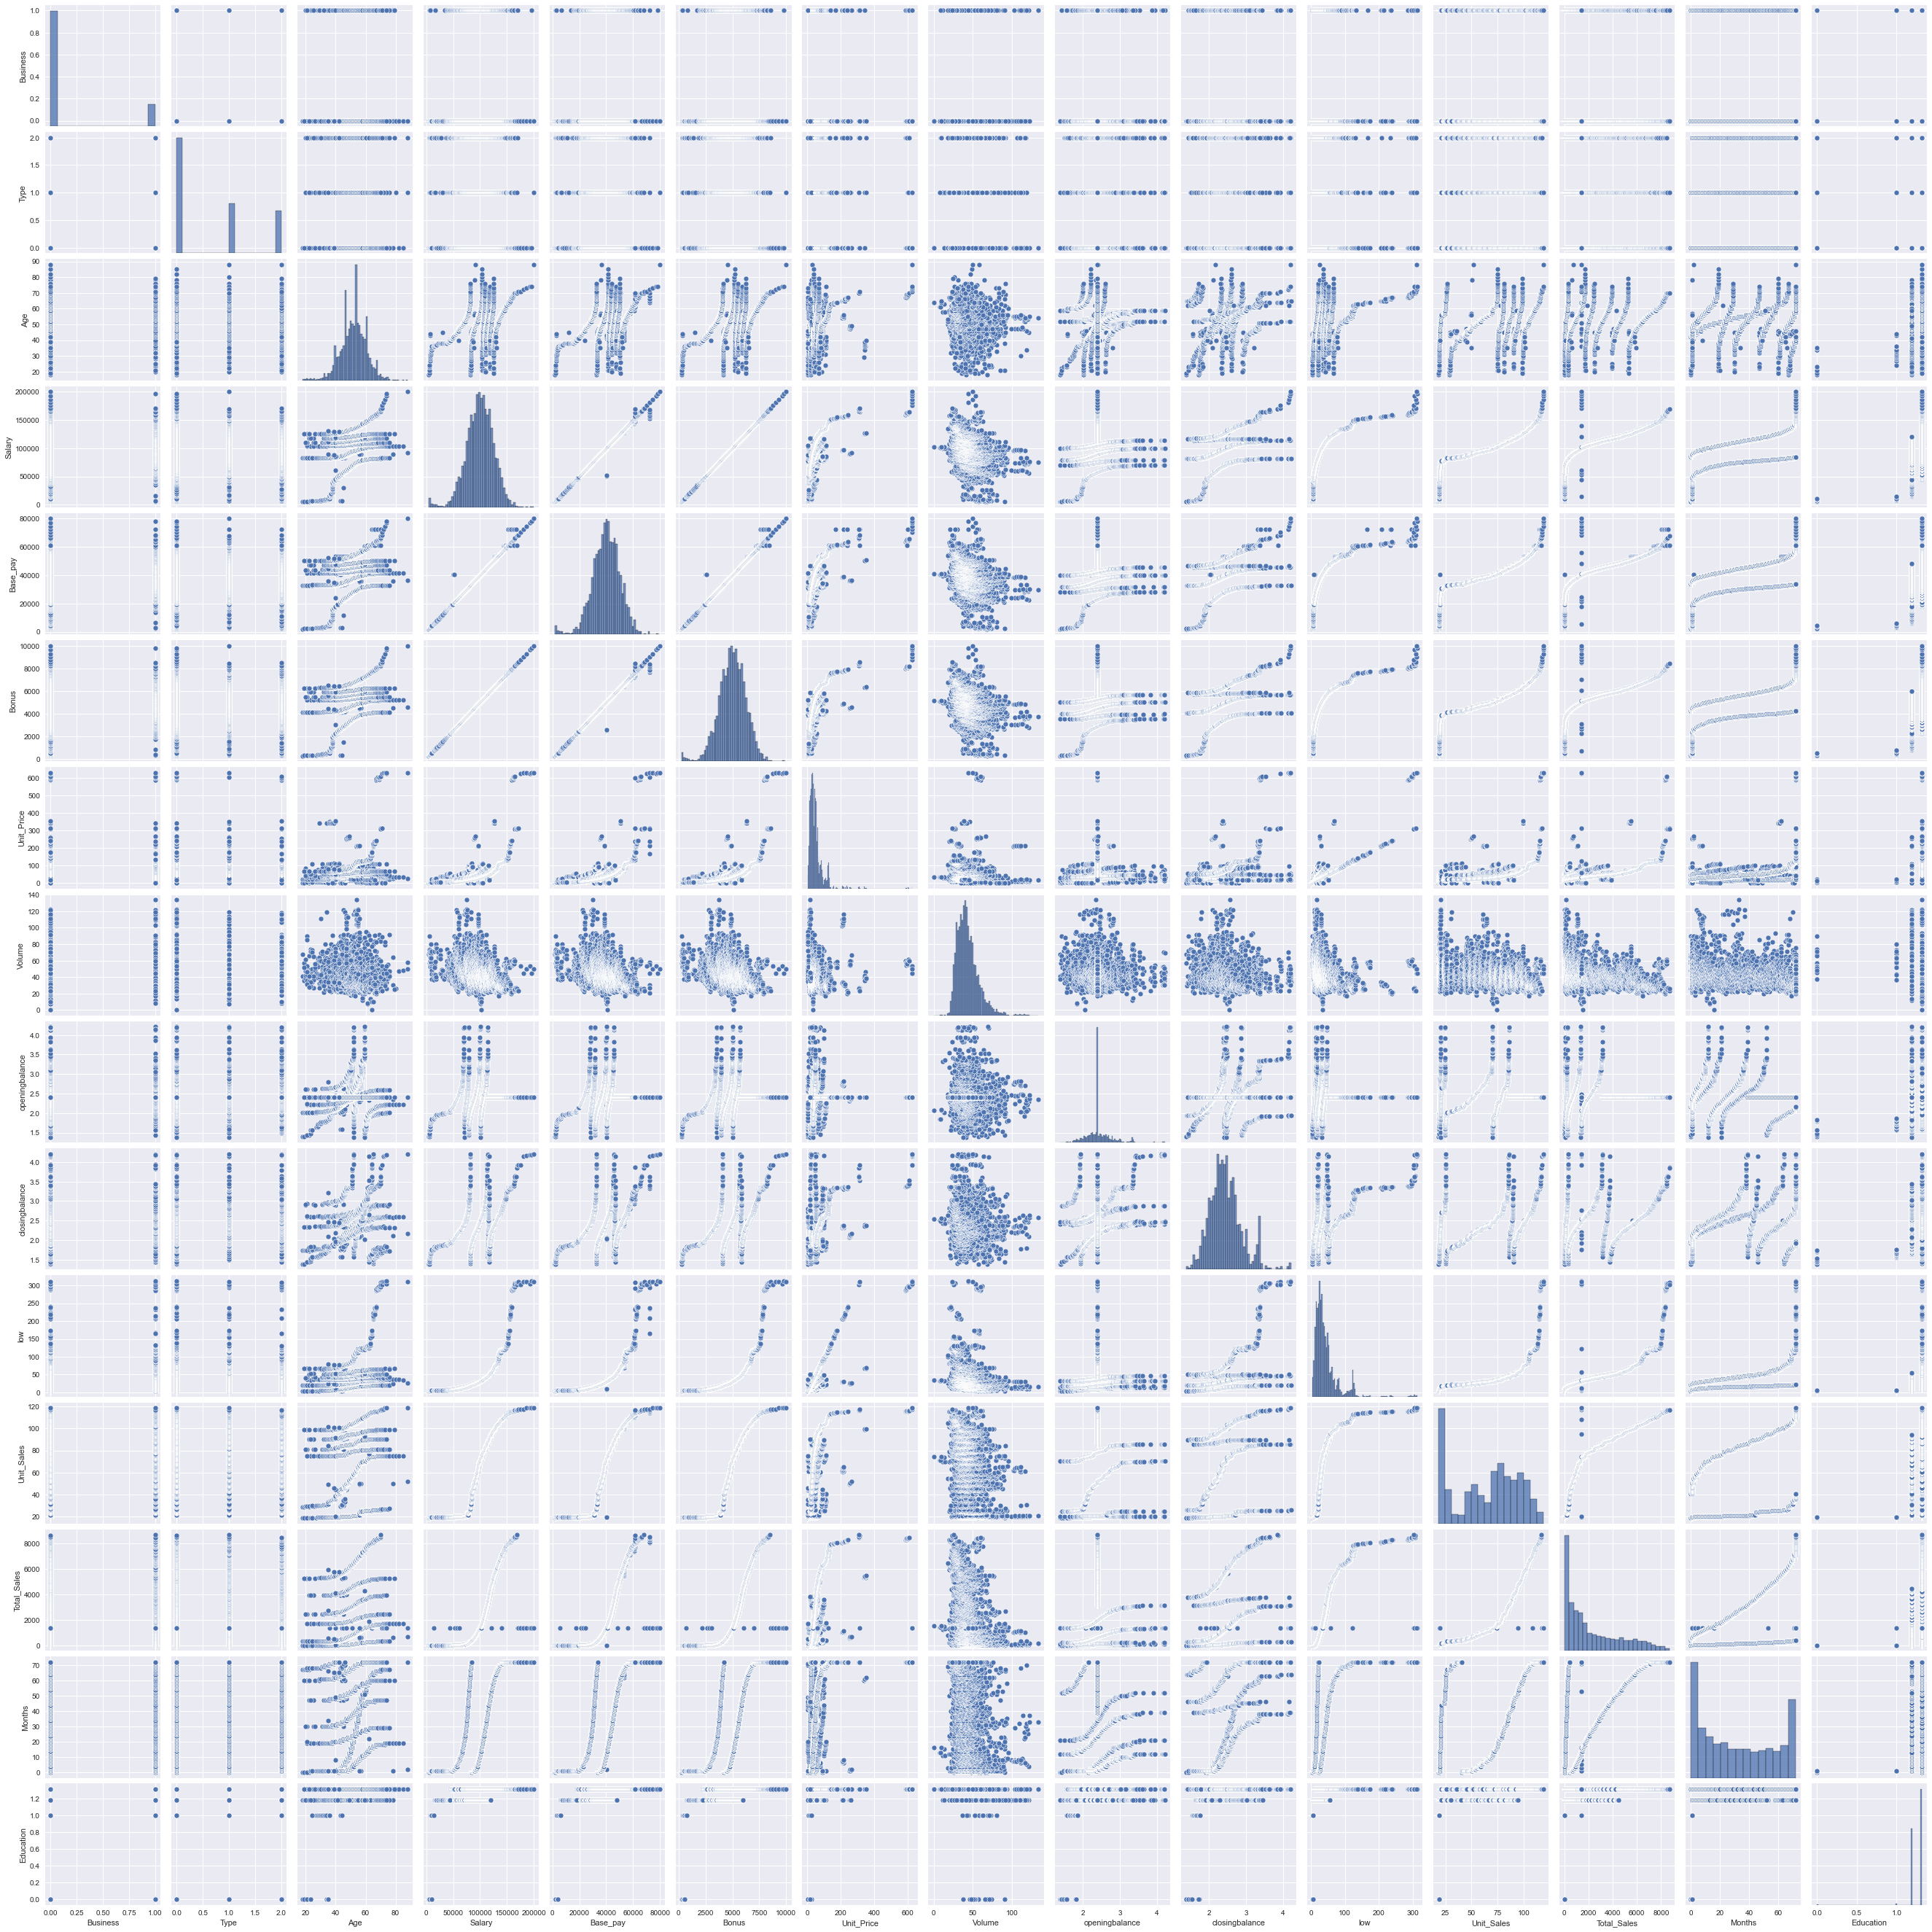

In [37]:
#Having a look at the pairplot.
sns.pairplot(df)

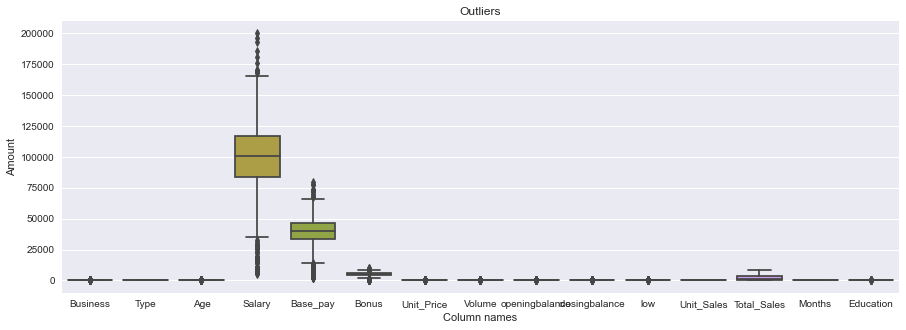

In [38]:
#Having a look at outlier in dataset now.
plt.figure(figsize =(15,5))
sns.boxplot(data = df[['Business','Type','Age','Salary','Base_pay','Bonus','Unit_Price','Volume','openingbalance','closingbalance','low','Unit_Sales','Total_Sales','Months','Education']])
plt.title("Outliers")
plt.xlabel('Column names')
plt.ylabel('Amount');

* Here we can see, we have some outliers in our dataset. 
* I tried to remove outlier but it removes 70-80% of data. So, I leave them as it is.

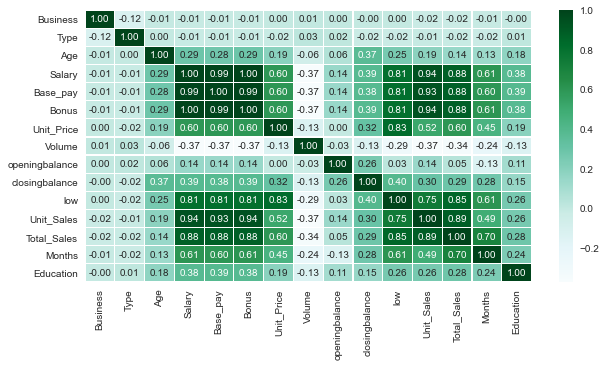

In [39]:
#Having a look at the correlation matrix now.
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),
            annot = True,
            linewidths = "0.2",
            fmt = "0.2f",
            cmap = "BuGn");

* This correlation matrix represent:
    1. Higher the positive values represent higher the positive correlation.
    2. Higher the negative values represent higher the negative correlation.
    
    
* As we can see correlation of (closing balance, opening balance, Education) is increased in the positive direction, and the Volume column correlation also slightly increased in the negative direction.    

In [40]:
#Having a look at the dataset.
df.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,0,No,Yes,18,5089.00,2035.600,254.4500,3.77,67.876605,1.391579,1.392506,3.65,18.25,18.80,0,0.0
1,Female,0,No,Yes,0,No,Yes,19,5698.12,2279.248,284.9060,3.74,56.873765,1.400765,1.385039,3.65,18.40,18.85,0,0.0
2,Male,0,No,Yes,0,Yes,No,22,5896.65,2358.660,294.8325,3.89,65.813350,1.434119,1.439177,3.72,18.70,18.90,0,0.0
3,Female,1,No,Yes,0,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,90.178003,1.436655,1.440852,3.83,18.75,19.00,0,0.0
4,Male,0,No,Yes,0,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,71.996211,1.479394,1.449138,4.08,18.80,19.05,1,0.0


In [41]:
#Removing all categorical columns which show no relation with the Salary column.
df.drop(['Gender','Dependancies','Calls','Billing','Rating'],axis = 1 , inplace = True)

In [42]:
#Having a look at columns now.
df.head()

,Business,Type,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,0,0,18,5089.00,2035.600,254.4500,3.77,67.876605,1.391579,1.392506,3.65,18.25,18.80,0,0.0
1,0,0,19,5698.12,2279.248,284.9060,3.74,56.873765,1.400765,1.385039,3.65,18.40,18.85,0,0.0
2,0,0,22,5896.65,2358.660,294.8325,3.89,65.813350,1.434119,1.439177,3.72,18.70,18.90,0,0.0
3,1,0,21,6125.12,2450.048,306.2560,4.35,90.178003,1.436655,1.440852,3.83,18.75,19.00,0,0.0
4,0,0,23,6245.00,2498.000,312.2500,4.34,71.996211,1.479394,1.449138,4.08,18.80,19.05,1,0.0


* As we can see, we have successfully removed categorical columns.

# Preparing the Data for Modeling

In [43]:
#spliting dataset into x and y.
x = df.drop('Salary',axis = 1)
x.head()

,Business,Type,Age,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,0,0,18,2035.600,254.4500,3.77,67.876605,1.391579,1.392506,3.65,18.25,18.80,0,0.0
1,0,0,19,2279.248,284.9060,3.74,56.873765,1.400765,1.385039,3.65,18.40,18.85,0,0.0
2,0,0,22,2358.660,294.8325,3.89,65.813350,1.434119,1.439177,3.72,18.70,18.90,0,0.0
3,1,0,21,2450.048,306.2560,4.35,90.178003,1.436655,1.440852,3.83,18.75,19.00,0,0.0
4,0,0,23,2498.000,312.2500,4.34,71.996211,1.479394,1.449138,4.08,18.80,19.05,1,0.0


In [44]:
y = df['Salary']
y

0         5089.00
1         5698.12
2         5896.65
3         6125.12
4         6245.00
          ...    
4995    180696.80
4996    185685.90
4997    192636.80
4998    195970.70
4999    199970.74
Name: Salary, Length: 5000, dtype: float64

* Here I am using RandomForestRegressor :
    1. Because in this project our dependent variable is continuous in nature.
    2. As we have seen, we have some outliers as well in our dataset and Randomforest is less significant with outlier and missing values.
    3. We cannot go with the linear Regression because our features are not normally distributed.
    4. We cannot go with the Decision Tree because it is less efficient on continous data.
    5. We cannot go with the KNN because there are outliers present in our dataset.
    6. We cannot go with the SVM because it perform well only when the dependent variable are categorical in nature.

In [45]:
#Importing Required library.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#Importing evaluation metrix.
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,r2_score

In [46]:
#Preparing Model.
model = RandomForestRegressor(n_jobs = - 1,random_state = 7)
#n_job = -1 Means our model will take as many rows as possible.

model.fit(x,y)

RandomForestRegressor(n_jobs=-1, random_state=7)

In [47]:
#Having a look at the model score.
model.score(x,y)

0.9999870621630533

In [48]:
#Spliting the data into train and test.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [49]:
#Having a look at the shape of train data.
print(x_train.shape,y_train.shape)

(3500, 14) (3500,)


* Here because we are using the Randomforest technique, So we don't need to perform any kind of feature Scaling technique on our dataset. 

In [50]:
#Creating Rmse(Root mean square error).
def rmse(y_train,y_pred):
    
    return np.sqrt(mean_squared_log_error(y_train,y_pred))

#Creating function for the model score.
def model_score(model):
    
    y_pred = model.predict(x_train)
    
    score = {"mae"  : mean_absolute_error(y_train,y_pred),
             "rmse" : rmse(y_train,y_pred),
             "r2_score"  : r2_score(y_train,y_pred)}
    
    return score

In [51]:
#Preparing Model.
model = RandomForestRegressor(n_jobs = - 1,random_state = 42)
#n_job = -1 Means our model will take as many rows as possible.

#fiting train data inside the model.
model.fit(x_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [52]:
#Having a look at the model score of train and test data.
print('Train data:', model.score(x_train,y_train))

print('Test data:', model.score(x_test,y_test))

Train data: 0.9999766534793297
Test data: 0.9998908140180717


* Here we can see our model is performing pretty well on train and test dataset.
* So we don't need to try on any other model.

In [53]:
#Having a look at the model performance.
model_score(model)

{'mae': 15.914640885024165,
 'rmse': 0.00413672160487347,
 'r2_score': 0.9999766534793297}

* As we can notice RMSC score: 0.003, which means our model is performing well on both train and test datasets.

In [54]:
#Having a look at predicated Salary.
y_pred = model.predict(x_train)
y_pred

array([127251.392702 ,  85941.9460082,  56769.9892617, ...,
       147766.252559 , 121433.038583 ,  84826.5501088])

In [55]:
#Loading predicated Salary inside the dataframe.
Compare_salary = pd.DataFrame(y_pred)

#Renaming the column name.
Compare_salary.columns = ['Pred_Salary']

In [56]:
#Having a look at y_train data.
y_train

4352    127243.05110
1376     85943.89201
221      56808.86095
2897    105375.48680
1592     89164.79639
            ...     
3771    117174.90740
3308    110840.60560
4899    147745.99230
4066    121434.98280
1319     84809.60229
Name: Salary, Length: 3500, dtype: float64

In [57]:
#Reseting the index of y_train.
y_train = y_train.reset_index()

In [58]:
#Renaming y_train columns names.
y_train.columns = ['xyz',"Salary"]

In [59]:
#Droping that first columns.
y_train.drop('xyz', axis = 1 ,inplace = True)

#Having a look at the train data now.
y_train

,Salary
0,127243.05110
1,85943.89201
2,56808.86095
3,105375.48680
4,89164.79639
...,...
3495,117174.90740
3496,110840.60560
3497,147745.99230
3498,121434.98280


In [60]:
#Comparing train and predicted salary columns.
Compare_salary['Train_Salary'] = y_train
Compare_salary

,Pred_Salary,Train_Salary
0,127251.392702,127243.05110
1,85941.946008,85943.89201
2,56769.989262,56808.86095
3,105380.788202,105375.48680
4,89168.118446,89164.79639
...,...,...
3495,117178.747433,117174.90740
3496,110848.887422,110840.60560
3497,147766.252559,147745.99230
3498,121433.038583,121434.98280


* As we can see the difference between train and predicted salary is very minimal.

# Features Importance

In [61]:
#Having a look at feature importances.
model.feature_importances_

array([1.85435015e-06, 2.75498532e-06, 6.39080371e-04, 9.05397333e-02,
       5.47357906e-01, 7.34724291e-04, 2.40266276e-05, 7.83581630e-03,
       6.72797590e-03, 9.66305236e-03, 3.12579111e-01, 1.74941408e-02,
       6.36490269e-03, 3.49207997e-05])

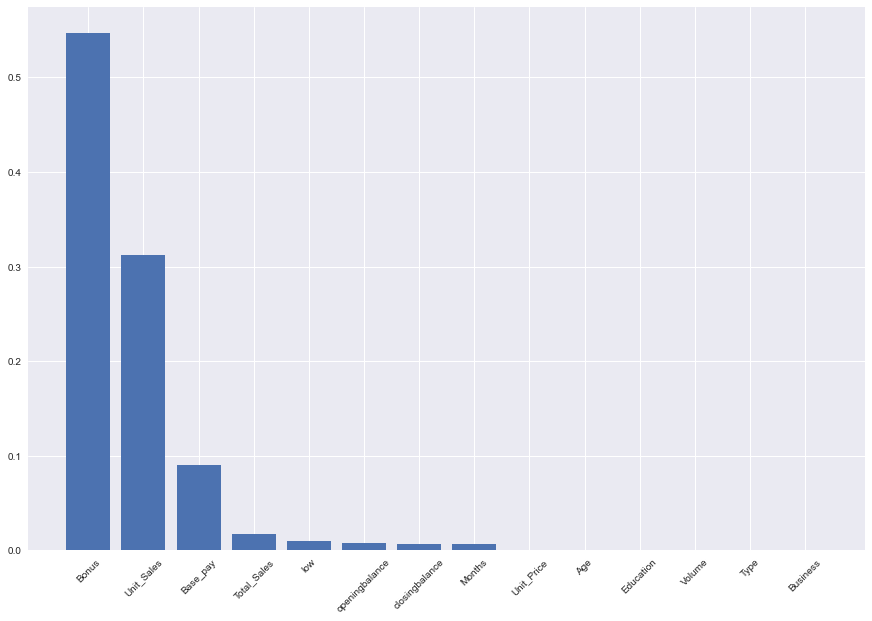

In [62]:
#Visualizing features importances of each columns.
def feature_imp(columns,importances):
    
    df = pd.DataFrame({"features" : columns,
                       "feature_importances" : importances}).sort_values("feature_importances", ascending = False)
    
    plt.figure(figsize = (15,10))
    plt.bar(df["features"], df["feature_importances"])
    plt.xticks(rotation = 45)
    

feature_imp(x_train.columns,model.feature_importances_)    

* From this visualization we can say that the top 5 major factors for salary measure are:
    1. Bonus: Amount received by a person as a bonus for sales
    2. Unit_sale: Unit sale made by the person
    3. Base_pay: Base pay of the employee
    4. Total_sale: Total sales made by the person
    5. Low: Lowest balance allotted to a person